# AA Project

Juan Pablo Zaldivar y Enric Millán

## 0. Importación de librerias <a class="anchor" id="Importación de librerias"></a>

In [29]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
from collections import Counter
import matplotlib.pyplot as plt

In [30]:
# Extra imports
from pandas import read_csv
from scipy.stats import boxcox
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.genmod.generalized_linear_model import GLM

## 1. Contexto del proyecto <a class="anchor" id="Contexto del proyecto"></a>

League of Legends (también conocido como LoL) es un videojuego multijugador en línea de estrategia en tiempo real y de género MOBA (Multiplayer Online Battle Arena), en el cual dos equipos de cinco jugadores compiten para destruir la base del equipo contrario en un mapa simétrico. Cada jugador controla a un personaje, llamado campeón, que tiene habilidades únicas y distintas para luchar contra los enemigos y para ayudar a su equipo a ganar la partida. Los jugadores ganan experiencia y oro al derrotar a los enemigos y a los monstruos del mapa, lo que les permite mejorar sus habilidades y comprar objetos para fortalecer a sus campeones. 

League of Legends es uno de los videojuegos más populares y competitivos del mundo, con millones de jugadores en todo el mundo, por lo que hemos creído interesante estudiar datos de los **10 primeros minutos** de casi 10,000 partidas del rango Diamante (uno de los rangos usados para clasificar a los jugadores según su nivel) para intentar predecir el desenlace de estas partidas y analizar que factores tienen más importancia en los 10 primeros minutos a la hora de que uno de los dos equipos gane la partida.

Los datos han sido extraídos de [*Kaggle*](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download), pero han sido distribuídos originalmente por *Riot Games* (empresa creadora de League of Legends).

## 2. Preprocesado de los datos <a class="anchor" id="Preprocesado de los datos"></a>

### 2.1. Lectura de los datos <a class="anchor" id="Lectura de los datos"></a>

In [31]:
# Load the data
dataset = read_csv("league_dataset.csv", header=0, delimiter=',')
dataset.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [32]:
dataset.shape

(9879, 40)

Tras la lectura de los datos observamos que tenemos 9879 partidas, cada una de ellas con 40 columnas, las cuales representan las características de cada partida. La columna **blueWins** es la que nos indica si el equipo azul ha ganado la partida o no, por lo tanto será nuestra variable objetivo. 

La variable objetivo es una variable binaria, por lo que podemos calcular la proporción de partidas ganadas por el equipo azul y el equipo rojo.

Con respecto a las variables predictoras, podemos observar que tenemos 37 variables numéricas y 3 variables categóricas (existen otras variables que toman valores en un conjunto discreto y finito, pero de momento no consideramos que resulte útil tratarlas como categóricas).

In [33]:
dataset.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Las variables categoricas son **blueFirstBlood**, **blueDragons** y **blueHeralds** (y sus contrapartes del equipo rojo). La primera variable indica si el equipo azul ha conseguido la primera sangre o no, mientras que la segunda y tercera indican si el equipo azul ha conseguido matar al dragon y al heraldo respectivamente.

En cuanto a los valores que toman estas variables, podemos observar que las tres variables toman valores binarios.

In [34]:
dataset.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

Como podemos observar en la tabla anterior, no tenemos ningún valor nulo en nuestro dataset, por lo que no será necesario realizar ningún tratamiento de valores nulos.

In [35]:
dataset.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


Tras la descripción de las variables, podemos observar que hay correlación entre las variables del equipo azul y del equipo rojo. Por lo que en el apartado 2.2 se realiza un estudio de las correlaciones entre las variables predictoras para ver si es necesario eliminar alguna de ellas.

### 2.2 Limpieza de los datos <a class="anchor" id="Limpieza de los datos"></a>


Antes de empezar a trabajar con el dataset, vamos a eliminar variables que no tienen repercusión alguna en el desenlace de una partida o que son redundantes:

- *gameId* : esta variable actua como identificador de cada partida, algo que no tiene influencia sobre la propia partida.

- *redCSPerMin* : esta variable es completamente dependiente de *redTotalMinionsKilled*, pues su valor es el esta ultima variable dividido entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *blueCSPerMin* : mismo caso que con *redCSPerMin*.

- *redGoldPerMin* y *blueGoldPerMin*: exactamente la misma situación que con las dos variables anteriores, sus valores son los de *redTotalGold* y *blueTotalGold* divididos entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *redGoldDiff* y *blueGoldDiff* : estas variables toman el mismo valor pues son la diferencia entre el oro total de un equipo y el del otro, por lo que resultan variables redundantes.

- *redEliteMonsters* y *blueEliteMonsters* : estas variables son la suma de *redDragons* y *redHeralds*, y *blueDragons* y *blueHeralds* respectivamente, por lo que también son variables redundantes.

- *redExperienceDiff* y *blueExperienceDiff* : tal y como pasa con las variables que representan la diferencia de oro, estas representan la diferencia de experiencia por lo que son directamente dependientes de *redTotalExperience* y *blueTotalExperience*.

- *redDeaths* y *blueDeaths* : variables directamente ligadas a *blueKills* y *redKills*, por lo que son redundantes.

- *redFirstBlood* : variable directamente ligada a *blueFirstBlood*, si esta última toma valor 1 el equipo azul ha hecho la primera sangre, si toma valor 0 el equipo rojo ha hecho la primera sangre. Podría darse el caso de que ninguno de los dos equipos haga la primera sangre, pero esto no es posible en el dataset, pues si ninguno de los dos equipos ha hecho la primera sangre, ambas variables toman valor 0 y como se comprueba a continuación, no hay ninguna partida en la que esto ocurra.

In [36]:
len(dataset[(dataset['blueFirstBlood'] == 0) & (dataset['redFirstBlood'] == 0)])

0

In [37]:
del dataset['gameId']
del dataset['blueCSPerMin']
del dataset['blueGoldPerMin']
del dataset['blueGoldDiff']
del dataset['blueDeaths']
del dataset['blueEliteMonsters']
del dataset['blueExperienceDiff']
del dataset['redDeaths']
del dataset['redCSPerMin']
del dataset['redGoldDiff']
del dataset['redFirstBlood']
del dataset['redGoldPerMin']
del dataset['redEliteMonsters']
del dataset['redExperienceDiff']

In [38]:
dataset.head(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redKills,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,11,0,0,0,17210,...,6,8,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,0,0,0,14712,...,5,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,4,1,0,0,16113,...,11,14,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,0,1,0,15157,...,5,10,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,0,0,0,16400,...,6,7,1,0,0,17404,7.0,18313,225,67
5,1,18,0,0,5,6,1,0,0,15899,...,3,2,0,0,0,15201,7.0,18060,221,59
6,1,18,3,1,7,7,1,0,0,16874,...,6,9,0,0,0,14463,6.4,15404,164,35
7,0,16,2,0,5,3,0,0,0,15305,...,13,11,1,0,0,17920,6.6,16938,157,54
8,0,16,3,0,7,8,0,0,0,16401,...,7,5,1,1,0,18380,7.2,19298,240,53
9,1,13,1,1,4,5,1,0,0,15057,...,5,4,0,0,0,16605,6.8,18379,247,43


### 2.3 Descripción de las variables <a class="anchor" id="Descripción de las variables"></a>

Para los usuarios que no hayan jugado jamás al videojuego daremos una breve explicación de cada variable: 

- *blueWins* : esta variable indica si el equipo azul se ha alzado vencedor de la partida, es la variable que se quiere predecir (1 para victoria azul, 0 para victoria roja).

- *blueWardsPlaced* : indica el número de *wards* colocados por el equipo azul. Un *ward* aporta visión del mapa al equipo que lo coloca, por lo que puede suponer una ventaja táctica si se coloca apropiadamente.

- *blueWardsDestroyed* : indica el número de *wards* rojos destruidos por el equipo azul.

- *blueFirstBlood* : indica el equipo que ha hecho la primera sangre (primera *kill* o eliminación), 1 si ha sido el equipo azul, 0 si ha sido el equipo rojo.

- *blueKills* : indica el número total de *kills* o eliminaciones del equipo azul. Una *kill* se da cuando se elimina a uno de los jugadores rivales (tras ser eliminado se reaparece tras un cierto período de tiempo, por lo que no hay un límite de asesinatos).

- *blueAssists* : indica el número total de asistencias del equipo azul. Una asistencia se consigue cuando un jugador hace daño a un rival y en un corto periodo de tiempo ese rival es eliminado por otro jugador distinto (este consigue una *kill*).

- *blueDragons* : indica la cantidad de *Dragones* eliminados por el quipo azul. En los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueHeralds* : indica la cantidad de *Heraldos* eliminados por el equipo azul. Tal y como sucede con los dragones, en los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueTowersDestroyed* : indica el número de *torres* del equipo rojo (principales estructuras defensivas) destruídas por el equipo azul.

- *blueTotalGold* : indica el número total de oro conseguido por los integrantes del equipo azul. El oro permite comprar objetos que aportan ventajas y mejoran las estadísticas del jugador.

- *blueAvgLevel* : indica la media de nivel de los jugadores del equipo azul tras los 10 primeros minutos. Cada jugador sube de nivel con la *experiencia*, que se consigue eliminando *súbditos*, *monstruos* y jugadores enemigos entre otros.

- *blueTotalExperience* : indica la cantidad de experiencia total conseguida por el equipo azul. La experiencia permite subir de nivel al jugador y mejorar así sus habilidades y ataques.

- *blueTotalMinionsKilled* : indica la cantidad total de *minions* o *súbditos* eliminados por el equipo azul durante los 10 primeros minutos. Eliminar súbditos aporta tanto experiencia como oro.

- *blueTotalJungleMinionsKilled* : indica la cantidad de monstruos de la jungla eliminados por el equipo azul. Los monstruos de la jungla tienen una función similar a la de los súbditos, pero estos aportan más oro y experiencia al jugador del equipo con el rol de *jungla*.

También están estas mismas variables para el equipo rojo  (a excepción de las que han sido eliminadas por redundancia).


### 2.3.1 Glosario de términos <a class="anchor" id="Glosario de términos"></a>


- *Ward* : ítem que puede colocarse en el mapa para revelar una zona y aportar visión a tu equipo. Resulta muy útil a nivel táctico para controlar objetivos como Dragones o Heraldos.

- *Minion* o *Súbdito* : NPC (Non Playable Character) que pertenece a un equipo (aparecen la misma cantidad de súbditos para el equipo rojo y para el equipo azul). Cuando mueren aportan experiencia a los jugadores del equipo contrario cercanos, y oro exclusivamente al jugador enemigo que haya eliminado al súbidto.

- *Jungle Minion* o *Monstruo de la Jungla* : NPC que no pertenece a ningun equipo. Aporta oro y experiencia de la misma manera que los súbditos normales al ser eliminado, pero este oro y experiencia aumenta si el jugador que los elimina es que tiene el rol de *Jungla*. Según de que monstruo se trate también puede aportar potenciadores temporales al jugador que lo haya eliminado.

- *Dragones* : calificados como *Monstruos Épicos* aparecen en una zona concreta cada cierto tiempo (como se ha mencionado, en los primeros 10 minutos solo es posible eliminar a uno) del mapa y tiene mucha más vitalidad que los demás monstruos de la Jungla. Al ser eliminado por un equipo, además de aportar oro y experiencia a todos los miembros del equipo también les aporta un potenciador permanente que dura toda la partida y cuyos efectos varían según el tipo de dragón.

- *Heraldos* : también calificados como *Monstruos Épicos*, aparece en otra zona concreta del mapa cada cierto tiempo (solo es posible elimianr 1 durante los primeros 10 minutos) y aporta oro y experiencia al equipo que lo elimine, pero su principal utilidad es que tras ser eliminado el jugador que recoja su *ojo* podrá invocar al Herlado que actuará como un súbdito de gran tamaño y vida y que  si impacta contra estructuras enemigas (torres) causará un gran daño a estas.

- *Torres* : para ganar la partida se debe destruir el *Nexo* enemigo, y las torres son las estructuras defensivas que deben ser destruidas para poder llegar al *Nexo*. Destruir torres además de una ventaja táctica también aporta una gran cantidad de oro.

- *Nivel* : el nivel determina junto a los objetos el "poder" de un jugador. Todos los jugadores empiezan en nivel 1 al inicio de la partida y el nivel máximo es 18. Se sube de nivel con la experiencia conseguida por derrotar súbditos, jugadores rivales, etc.

### 2.4 Análisis exploratorio de los datos <a class="anchor" id="Análisis exploratorio de los datos"></a>

In [39]:
categorical_columns = list(dataset.dtypes[dataset.dtypes == 'O'].index.values)
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

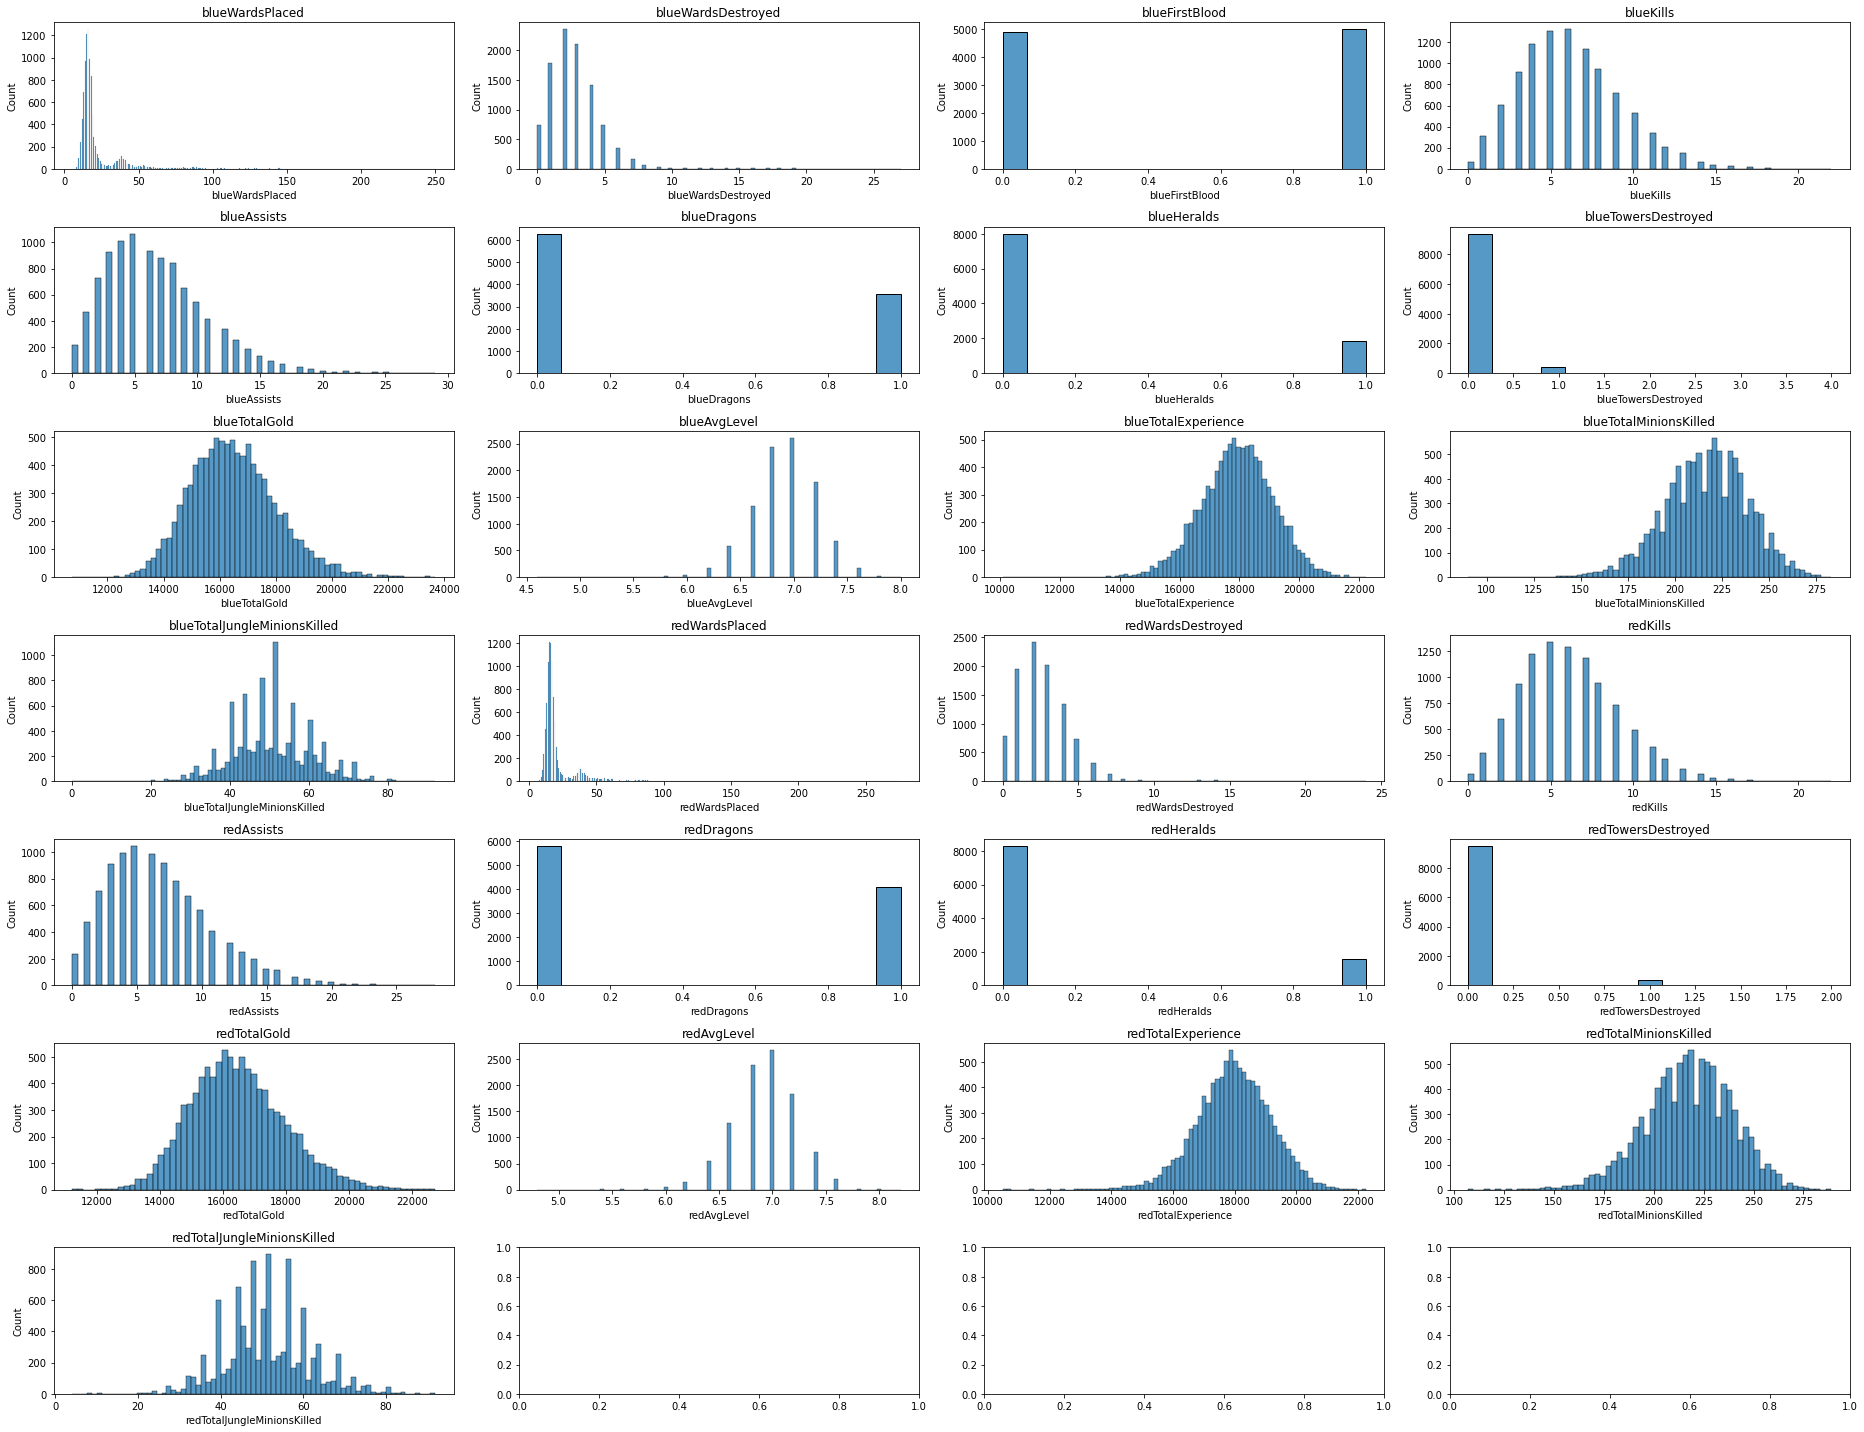

In [40]:
fig, axes = plt.subplots(7,4,figsize=(26,20))

# We will not plot country because it has too many categories.
for i, c in enumerate(dataset.columns[1:]):
    ax = axes.reshape(-1)[i]
    if dataset[c].dtype.kind == 'O': # If categorical
        a = sn.countplot(x=c,data=dataset,ax=ax, color='green')
    else: # If numerical
        b = sn.histplot(x=c,data=dataset,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

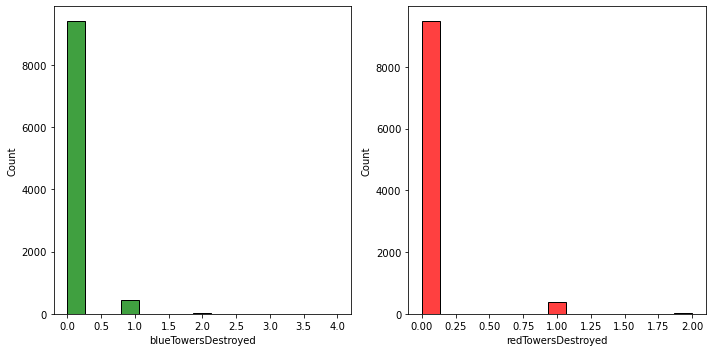

In [41]:
# plot the distribution of the blueTowersDestroyed and redTowersDestroyed variables
fig, axes = plt.subplots(1,2,figsize=(10,5))
a = sn.histplot(x='blueTowersDestroyed',data=dataset,ax=axes[0], color='green')
b = sn.histplot(x='redTowersDestroyed',data=dataset,ax=axes[1], color='red')
plt.tight_layout()

In [47]:
# show the data types of the columns
dataset.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueAssists                       int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redKills                          int64
redAssists                        int64
redDragons                        int64
redHeralds                        int64
redTowersDestroyed                int64
redTotalGold                      int64
redAvgLevel                     float64
redTotalExperience                int64
redTotalMinionsKilled             int64
